In [1]:
# Erdös CoverMyMeds project, Fall 2022
# "Trying to make sense of the formulary for each payer from pharmacy claims data"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import data and read as Pandas DataFrame
dim_claims = pd.read_csv("/Users/victoriauribe/Desktop/CoverMyMeds_data/dim_claims.csv")

In [2]:
# sort 'reject_code' column in ascending order from 70.0 to NaN and update DataFrame
dim_claims = dim_claims.sort_values(by=['reject_code'], ascending=True)

# create list of unique payers/insurance companies and sort in ascending order
payers = pd.unique(dim_claims["bin"])
payers = payers.tolist()
payers.sort()

# create list of unique drugs and sort in ascending order
drugs = pd.unique(dim_claims["drug"])
drugs = drugs.tolist()
drugs.sort()

# create list of unique rejection codes 
reject_codes = pd.unique(dim_claims["reject_code"])
reject_codes = reject_codes.tolist()

In [3]:
# create dictionary 
d = {}

# store unique DataFrame for each payer in dictionary (payer_0, payer_1, ...)
for i in range(len(payers)):
    d["payer_"+str(i)] = dim_claims[dim_claims["bin"]==payers[i]]

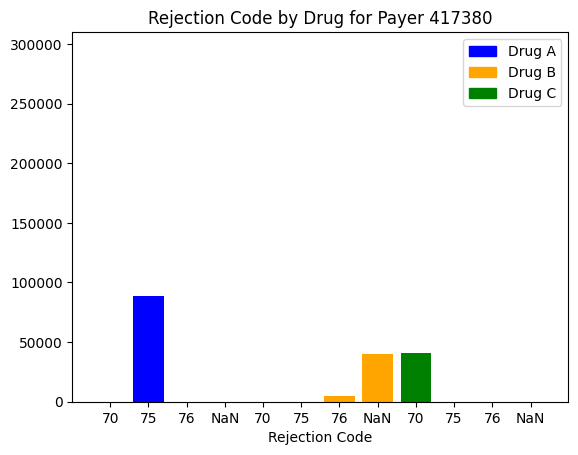

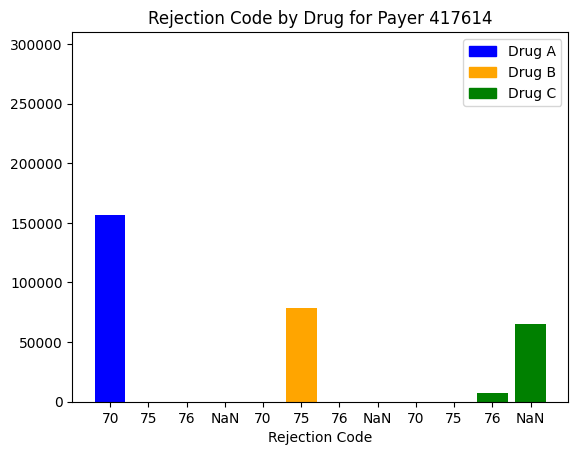

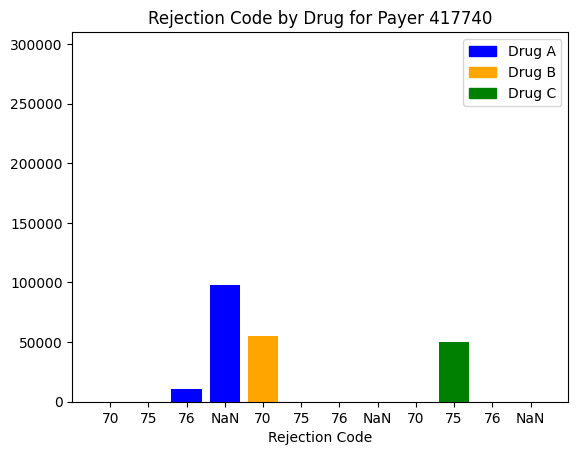

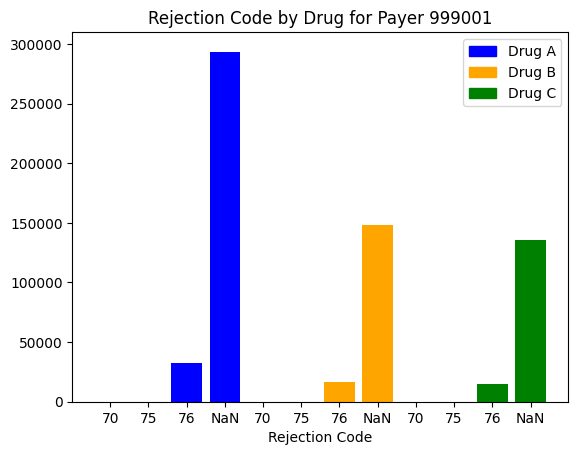

<Figure size 640x480 with 0 Axes>

In [4]:
# initiate index used for naming unique plots in for loop below
k = 0

# loop through each payer in dictionary d
for i in d.keys():
    
    data = d[i]

    # create array to store count of each rejection code for each drug
    storage = np.zeros((len(drugs),len(reject_codes)))

    # index i (rows) for drugs and index j (columns) for rejection codes
    for i in range(len(drugs)):
        for j in range(len(reject_codes)-1):
            storage[i,j] = len(data[(data['drug']==drugs[i]) & (data['reject_code']==reject_codes[j])])
        storage[i,len(reject_codes)-1] = len(data[(data['drug']==drugs[i]) & (data['reject_code'].isna())])

    # flatten storage array into list
    storage = storage.flatten()
    storage = storage.tolist()

    # bar plot 
    plt.bar(np.arange(len(storage)),storage, color=['blue','blue','blue','blue','orange','orange','orange','orange','green','green','green','green'])
    #x_labels = ("","Drug A","","","","Drug B","","","","Drug C","","")
    x_labels_2 = ("70","75","76","NaN","70","75","76","NaN","70","75","76","NaN")

    plt.xticks(np.arange(len(storage)),x_labels_2)
    plt.title("Rejection Code by Drug for Payer "+str(payers[k]))
    plt.xlabel("Rejection Code")
    #plt.legend(labels=['Drug A', 'Drug B', 'Drug C'])
    
    colors = {'Drug A':'blue', 'Drug B':'orange', 'Drug C': 'green'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)

    plt.ylim([0,310000])
    plt.figure()
    
    # advance index used for naming unique plots
    k = k+1

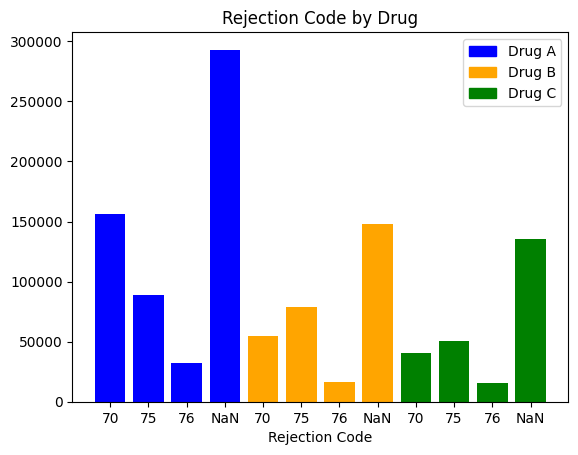

In [5]:
# plot of cumulative values (from all payers)

for i in d.keys():
    data = d[i]

    storage = np.zeros((len(drugs),len(reject_codes)))


    for i in range(len(drugs)):
        for j in range(len(reject_codes)-1):
            storage[i,j] = len(data[(data['drug']==drugs[i]) & (data['reject_code']==reject_codes[j])])
        storage[i,len(reject_codes)-1] = len(data[(data['drug']==drugs[i]) & (data['reject_code'].isna())])

    storage = storage.flatten()
    storage = storage.tolist()

    plt.bar(np.arange(len(storage)),storage, color=['blue','blue','blue','blue','orange','orange','orange','orange','green','green','green','green'])
    #x_labels = ("","Drug A","","","","Drug B","","","","Drug C","","")
    x_labels_2 = ("70","75","76","NaN","70","75","76","NaN","70","75","76","NaN")

    plt.xticks(np.arange(len(storage)),x_labels_2)
    plt.title("Rejection Code by Drug")
    plt.xlabel("Rejection Code")
    #plt.legend(labels=['Drug A', 'Drug B', 'Drug C'])

    colors = {'Drug A':'blue', 'Drug B':'orange', 'Drug C': 'green'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    
    #plt.figure()